# Introduction

In digital imaging, a pixel, pel, or picture element is a physical point in a raster image, or the smallest addressable element in an all points addressable display device; so it is the smallest controllable element of a picture represented on the screen.

Each pixel is a sample of an original image; more samples typically provide more accurate representations of the original. The intensity of each pixel is variable. In color imaging systems, a color is typically represented by three or four component intensities such as red, green, and blue, or cyan, magenta, yellow, and black.

The size of images can be ver huge, which can be quite expensive to store as well as transmit. In such cases, image compression can be applied. Formally, **Image compression** is the type of data compression applied to digital images to reduce their cost of storage or transmission. 

Here in this project we will be using K-Means alogorithm to compress the data in the image by reducing **bits per pixel** . Bits per pixel can be reduced by clustering similar colors to form a single color.

## Bits per pixel

The number of distinct colors that can be represented by a pixel depends on the number of bits per pixel (bpp). A 1 bpp image uses 1-bit for each pixel, so each pixel can be either on or off. Each additional bit doubles the number of colors available, so a 2 bpp image can have 4 colors, and a 3 bpp image can have 8 colors:

* 1 bpp, 21 = 2 colors (monochrome)
* 2 bpp, 22 = 4 colors
* 3 bpp, 23 = 8 colors
* 4 bpp, 24 = 16 colors
* 8 bpp, 28 = 256 colors
* 16 bpp, 216 = 65,536 colors ("Highcolor" )
* 24 bpp, 224 = 16,777,216 colors ("Truecolor")



In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

from skimage import io
# Importing ipywidgets for making the jupyter notebook interactive
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

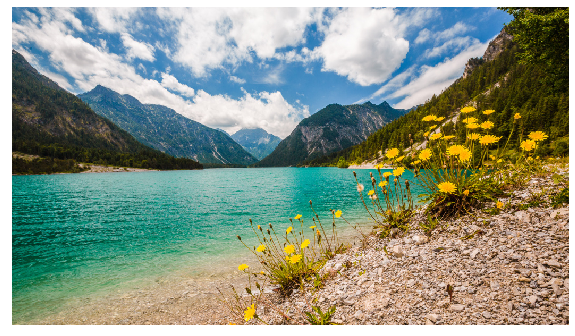

In [30]:
plt.figure(figsize = (10,6))
img = io.imread('images/landscape.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img)
plt.show()

In [31]:
print(img.shape)
h,w,c =img.shape

(600, 1050, 3)


In [32]:
img_data = (img / 255.0).reshape(h * w, c) # .reshape(-1, 3) and normalizing
img_data.shape

(630000, 3)

In [33]:
def colorSpace3D(img_data, title, num_pixels=10000, colors = None):
    """
    
    Inputs: 
    img_data: image as numpy array of shape [None,3], where 3 is number of channels
    title: title to be given to the plot
    colors: Default None, when not None, uses the cluster centers of each point in input img_data
    num_pixels = default 10000, should be an int, it is number of pixels to be used while creating a plot
    
    Output:
    Plots Color Space in 3 Dimensions
    
    """
    
    if colors is None:
            colors = img_data
    from mpl_toolkits import mplot3d
    fig = plt.figure(figsize = (15,10))
    ax = plt.axes(projection='3d')
   
    rand = np.random.RandomState(42)
    index = rand.permutation(img_data.shape[0])[:num_pixels]
    colors = colors[index]
    R, G, B = img_data[index].T
    ax.scatter3D(R, G, B, color=colors, marker='.')
    ax.set_xlabel("RED") 
    ax. set_ylabel("GREEN")
    ax. set_zlabel("BLUE")

    fig.suptitle(title, size=20, y = 0.92)

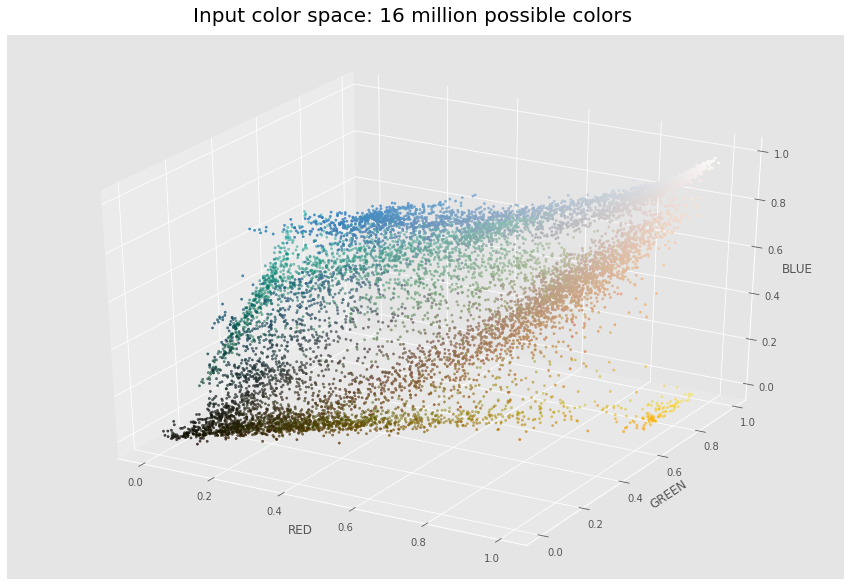

In [34]:
colorSpace3D(img_data, title='Input color space: 16 million possible colors')


In [35]:
R, G, B = img.reshape(-1, 3).T # segregating RGB channels

In [36]:
print(f"Minimum value Intesity of Red Channel is {R.min()}")
print(f"Maximun value Intesity of Red Channel is {R.max()}")

Minimum value Intesity of Red Channel is 0
Maximun value Intesity of Red Channel is 255


**It can be seen that Each Channel represents 256 levels of intensities ie $2^{8}$ levels of intensities. Hence, it can be said that each channel represents 8-bit or each pixel in image 24-bits per pixel**

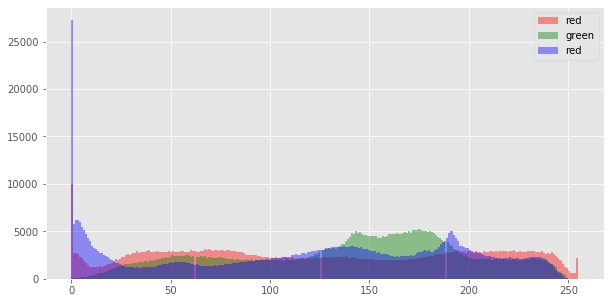

In [37]:
import seaborn as sns
plt.figure(figsize = (10,5))
sns.distplot(R,bins=256, color ='red', label = 'red', kde = False)
sns.distplot(G,bins=256, color ='green',label = 'green', kde = False)
sns.distplot(B,bins=256, color ='blue',label = 'red', kde = False)
plt.legend()
plt.show()

## Visualizing K-Means Clustering

<a title="Incheol [CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Kmeans_animation.gif"><img width="300" alt="Kmeans animation" src="https://upload.wikimedia.org/wikipedia/commons/d/d5/Kmeans_animation.gif"></a>
<h5 align="center">Incheol [<a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>], <a href="https://commons.wikimedia.org/wiki/File:Kmeans_animation.gif">From Wikimedia Commons, the free media repository</a></h5>

In [38]:
from sklearn.cluster import MiniBatchKMeans

In [39]:
k=16
kmeans = MiniBatchKMeans(k)
kmeans.fit(img_data)
cluster_cen =kmeans.cluster_centers_
img_pred = kmeans.predict(img_data) #clustering each point

In [40]:
img_pred[0:10]

array([15, 15, 15, 15, 15, 15, 10, 10, 10, 10])

In [41]:
k_color = cluster_cen[img_pred] # Assigning each pixel to the recuded color space

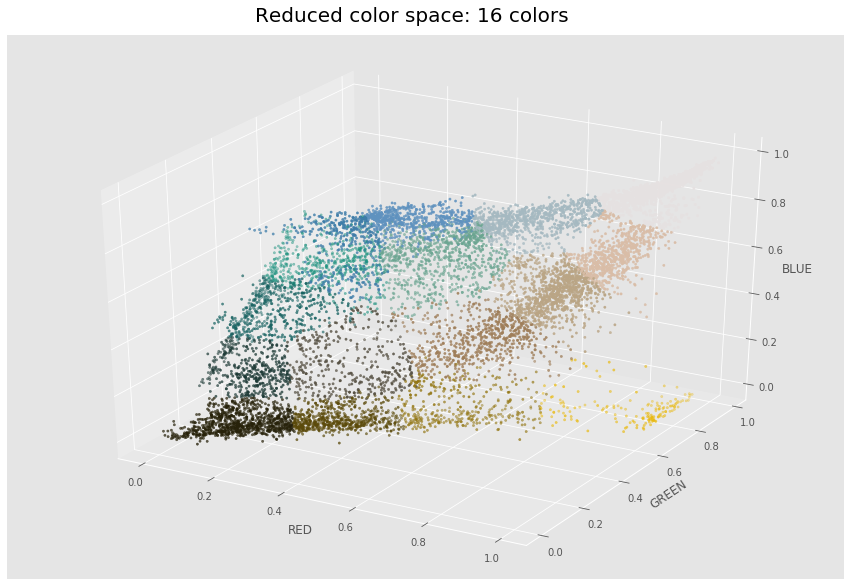

In [42]:
colorSpace3D(img_data, colors=k_color, title=f"Reduced color space: {k} colors")

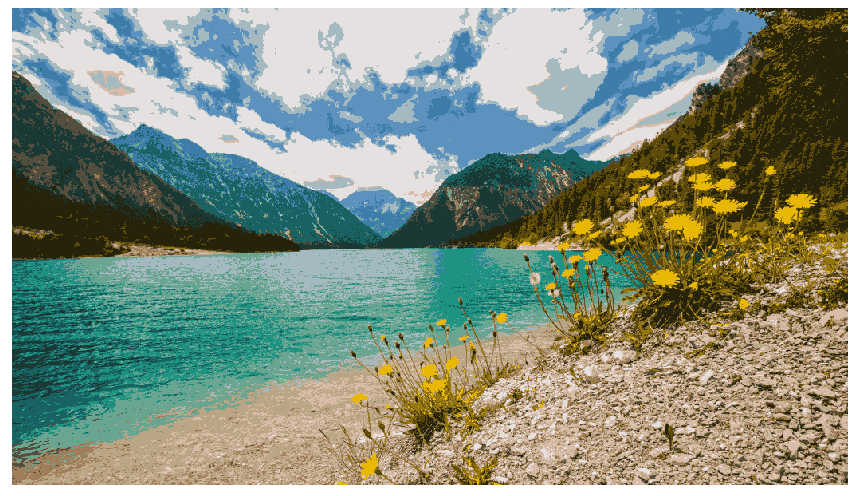

In [43]:
plt.figure(figsize = (15,10))
k_img = k_color.reshape(h,w,c)
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(k_img)
plt.show()

# Creating Interactive Widget Using Ipywidgets

In [45]:
img_dir = 'images/' #Specifying image Directory

In [47]:
@interact
def color_compression(image=os.listdir(img_dir), k=IntSlider(min=1,max=256,step=1,value=16,
                                                             continuous_update=False,
                                                             layout=dict(width='100%'))):
    
    input_img = io.imread(img_dir + image)
    img_data = (input_img / 255.0).reshape(-1, 3)
    
    kmeans = MiniBatchKMeans(k).fit(img_data)
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
    #After K-means has converged, load the large image into your program and 
    #replace each of its pixels with the nearest of the centroid colors you found
    #from the small image. 
    k_img = np.reshape(k_colors, (input_img.shape))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,5))
    fig.suptitle('K-means Image Compression', fontsize=20)
    
    ax1.set_title(f'Compressed and Reduced to {k} color space')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    
    ax2.set_title('Original (16,777,216 colors)')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)
    
    plt.subplots_adjust(top=0.85)
    plt.show()
    
    colorSpace3D(img_data, f"Reduced color space: {k} colors", colors = k_colors)

interactive(children=(Dropdown(description='image', options=('birds.jpg', 'landscape.jpg', 'monument.jpg', 'st…